# Análisis descriptivo y visualización de ventas de PepsiCo en Argentina.

Este proyecto tiene como objetivo analizar un conjunto de datos sin depurar correspondiente a las ventas de productos de PepsiCo realizadas por distintas distribuidoras en todo el país.

A través de herramientas de procesamiento y estadística descriptiva, se busca identificar patrones relevantes, limpiar el dataset y describir las variables disponibles para su análisis posterior.

---

## Integrantes del equipo

- Eglimar Ramirez  
- Francisco Oviedo  
- Jonathan Guillen  
- Jonathan Manuel Palomeque
- Lucas Ledesma  
- Maia Majzum  
- Valentina Pich


## Descripción general del dataset

El dataset contiene datos relacionados con la venta de productos, incluyendo:

- **Distribuidor**: nombre de la distribuidora.
- **Área**: región geográfica.
- **Artículo**: código identificador del producto.
- **Descripción**: nombre comercial del producto.
- **Cantidad**: unidades vendidas.
- **Capacidad**: gramos vendidos.
- **Línea**: línea o categoría comercial (ej. Gold, Platinum).
- **Rubro**: categoría general del producto (ej. Crakers).


## I) Importar librerias:


In [1]:
import pandas as pd #Importando librerias
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display #Libreria para mostrar dataframes

from google.colab import drive
drive.mount('/content/drive')

from google.colab import files

Mounted at /content/drive


## II) Cargar DataSet y crear el Dataframe:

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto -  Analisis de Datos - 2025/Listado_Ventas.csv', encoding='latin1') #Lectura del archivo .csv para cargar en el notebook
df.head(10) #Mostrando las primeras 10 filas del dataset

,Distribuidor,Area,Articulo,Descripcion,Cantidad,Capacidad,Linea,Rubro
0,TOTAL CENTRO S.R.L.,NEA y Litoral,300063098,Twistos Minit Queso 95gx30x1,4319.0,410495.00,Gold/Crakers,Crakers
1,TOTAL CENTRO S.R.L.,NEA y Litoral,300063097,Twistos Minit Queso 100gx30,4027.0,382565.00,Gold/Crakers,Crakers
2,TOTAL CENTRO S.R.L.,NEA y Litoral,300052695,Twistos Minit Jamon 100gx30,70.0,7.00,Gold/Crakers,Crakers
3,TOTAL CENTRO S.R.L.,NEA y Litoral,300052696,Twistos Minit Jamon 40gx112x1,3284940.0,34.36,Platinum/Crakers,Crakers
4,TOTAL CENTRO S.R.L.,NEA y Litoral,300063264,Twistos Minit Queso 40gx112x1,3284940.0,25.36,Platinum/Crakers,Crakers
5,TOTAL CENTRO S.R.L.,NEA y Litoral,300063263,Twistos Minit Jamon 40gx84,287.0,11.48,Platinum/Crakers,Crakers
6,TOTAL CENTRO S.R.L.,NEA y Litoral,300052694,Twistos Minit Jamon 155gx20,1881.0,291555.00,Silver/Crakers,Crakers
7,TOTAL CENTRO S.R.L.,NEA y Litoral,300062972,PehuamarÂ acanaladaÂ 230gx14x1,264.0,69.96,Bronze/Salty,Salty
8,TOTAL CENTRO S.R.L.,NEA y Litoral,300062973,Pehuamar Papa Lisa 230gx14x1,194.0,44.62,Bronze/Salty,Salty
9,TOTAL CENTRO S.R.L.,NEA y Litoral,300060197,Pehuamar Acanalada 485x9,97.0,22.31,Bronze/Salty,Salty


In [3]:
# Configurar pandas para que no use notación científica
pd.set_option('display.float_format', '{:,.2f}'.format)

## III) Exploración inicial del dataset

1. TAMAÑO DEL DATASET

In [4]:
df.shape

(1777, 8)

**Comentario:** El dataset consta de 1777 filas y 8 columnas

2. COLUMNAS

In [5]:
df.columns

Index(['Distribuidor ', 'Area', 'Articulo', 'Descripcion', 'Cantidad',
       'Capacidad', 'Linea', 'Rubro'],
      dtype='object')

3. TIPO DE DATOS

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Distribuidor   1777 non-null   object 
 1   Area           1777 non-null   object 
 2   Articulo       1777 non-null   int64  
 3   Descripcion    1777 non-null   object 
 4   Cantidad       1693 non-null   float64
 5   Capacidad      1777 non-null   float64
 6   Linea          1777 non-null   object 
 7   Rubro          1777 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 111.2+ KB


**Comentarios:**

La data incluye:


*  variables numéricas: Articulo, Cantidad y Capacidad, estas dos últimas se deben convertir a tipo de dato entero.

*  variables categóricas: Distribuidor, Area, Descripcion, Linea y Rubro.

*  Sólo la variable cantidad prensenta datos nulos y además representa datos enteros de cantidad de artíclos, por lo que debe transformarse a int64.

* La variable Capacidad, puede soportar valores decimales de acuerdo a la unidad de medida que se emplee. En gramos sería una variable entera, pero en kg puede ser decimal.

4. TRANSFORMANDO EL TIPO DE DATO DE LA VARIABLE CANTIDAD

In [7]:
# Hacer una copia del dataset
df_copia = df.copy()

# Transformar columnas de float a int
df_copia["Cantidad"] = df_copia["Cantidad"].astype("Int64")  # Usa 'Int64' para soportar valores nulos


# Verificar los cambios
print(df_copia[["Cantidad"]].dtypes)

Cantidad    Int64
dtype: object


## IV) Analisis de columnas numéricas (válidos, nulos, media, mediana, desviación estandar y mal registrados)

1. EXPLORACIÓN PARCIAL

In [8]:
# Estadísticas para 'cantidad'
print("📊 Estadísticas de 'Cantidad':\n")
print(df_copia['Cantidad'].describe(percentiles=[.25, .5, .75, .9]))

# Estadísticas para 'capacidad'
print("\n📊 Estadísticas de 'Capacidad':\n")
print(df_copia['Capacidad'].describe(percentiles=[.25, .5, .75, .9]))



📊 Estadísticas de 'Cantidad':

count       1,693.00
mean      109,210.49
std       582,171.96
min           -33.00
25%           165.00
50%           655.00
75%         2,878.00
90%         8,597.40
max     3,284,940.00
Name: Cantidad, dtype: Float64

📊 Estadísticas de 'Capacidad':

count        1,777.00
mean       105,021.86
std        671,860.82
min         -5,005.00
25%             28.35
50%            221.24
75%         33,649.00
90%        226,057.20
max     25,294,038.00
Name: Capacidad, dtype: float64


**Observaciones:**


**variable Cantidad:**

- Hay 1693 valores no nulos.
- En promedio, hay 109 mil unidades por registro.
- La desviación estándar muy alta, lo que indica mucha dispersión, hay valores muy alejados del promedio.
- Hay cantidades negativas que se consideran no válidas en el análisis.
- El 25% de los datos tiene menos de 165 unidades.
- La mitad de los registros tiene menos de 655 unidades.
- El 75% tiene menos de 2878 unidades.
- El valor max es muy alto con respecto al 90% de los datos, se considera que hay valores extremos.


**variables capacidad:**
- Hay 1777 Valores no nulos.
- Promedio de capacidad muy alto.
- Muy alta dispersión también.
- Capacidad con valores negativos.
- Un cuarto de los productos tiene menos de ~33g.
- La mitad tiene menos de ~246g.
- 75% tiene menos de 36 kg.
- valor max	25,294,040.0	Más de 25 toneladas si está en gramos. Es muy probable que sea un error de carga.

**Conlusiones y Recomendaciones:**
                                                                                

- Hay outliers fuertes que sesgan el promedio.

- Hay datos negativos que no tienen sentido.

- El rango es enorme, desde gramos hasta toneladas en la columna capacidad.


- Se Requiere revisar unidades (g, kg, error de carga).

- Tratar outliers extremos y negativos.



2. EXPLORACIÓN GENERAL

In [9]:
# Seleccionar columnas numéricas
columnas_numericas = df_copia.select_dtypes(include='number').columns

# Crear una lista para almacenar resultados
resultados = []

for col in columnas_numericas:
    total = len(df_copia)
    validos = df_copia[col].notna().sum()
    nulos = df_copia[col].isna().sum()

    # Se interpretan como mal registrados o erróneos los valores negativos o cero.
    erroneos = df_copia[col][df_copia[col] <= 0].count()

    media = df_copia[col].mean()
    mediana = df_copia[col].median()
    std = df_copia[col].std()

    resultados.append({
        "Columna": col,
        "Total": total,
        "Válidos": validos,
        "Nulos": nulos,
        "Erróneos": erroneos,
        "Media": round(media, 2),
        "Mediana": round(mediana, 2),
        "Desvío estándar": round(std, 2)
    })

# Mostrar resultados
pd.DataFrame(resultados)

,Columna,Total,Válidos,Nulos,Erróneos,Media,Mediana,Desvío estándar
0,Articulo,1777,1777,0,0,"300,057,158.72","300,060,091.00","6,640.24"
1,Cantidad,1777,1693,84,6,"109,210.49",655.00,"582,171.96"
2,Capacidad,1777,1777,0,8,"105,021.86",221.24,"671,860.82"


## V) Análisis de columnas categóricas (válidos, nulos, mal registrados y cantidad de registros por categoría)

1. EXPLORACIÓN GENERAL

In [10]:
# Seleccionar solo las columnas categóricas (no numéricas)
columnas_categoricas = df_copia.select_dtypes(exclude='number').columns

# Guardar resultados en una lista
resultados = []

for col in columnas_categoricas:
    total = len(df_copia)
    validos = df_copia[col].notna().sum()
    nulos = df_copia[col].isna().sum()
    categorias = df_copia[col].nunique()

    # Se interpretan como mal registrados o erróneos los valores vacíos
    erroneos = df_copia[col].isin(["", " ", "-", "Sin dato", "No aplica"]).sum()

    resultados.append({
        "Columna": col,
        "Total registros": total,
        "Válidos": validos,
        "Nulos": nulos,
        "Mal registrados (vacíos o inválidos)": erroneos,
        "Cantidad de categorías distintas": categorias
    })

# Mostrar resultados
pd.DataFrame(resultados)

,Columna,Total registros,Válidos,Nulos,Mal registrados (vacíos o inválidos),Cantidad de categorías distintas
0,Distribuidor,1777,1777,0,0,20
1,Area,1777,1777,0,0,7
2,Descripcion,1777,1777,0,0,255
3,Linea,1777,1777,0,0,15
4,Rubro,1777,1777,0,0,3


1. EXPLORACIÓN PARCIAL

In [11]:
for col in columnas_categoricas:
    print(f"\nColumna: {col}")
    print(df_copia[col].value_counts().sort_index())


Columna: Distribuidor 
Distribuidor 
BACOSHOPERS SRL                   81
BAHIA BLANCA S.R.L.               95
BARASI HNOS SA                    97
BRINDARSE S.A.                   105
CHABS S. R. L.                    51
DISTRIBUIDORA AMANECER S.R.L.     90
DISTRIBUIDORA CATAMARCA S. A.     87
DISTRIBUIDORA J.F.T. S.R.L.       91
DISTRIBUIDORA NORTE S.R.L.        53
DISTRIBUIDORA POSITANO SRL        98
ELECTRON SRL                      92
LEGOS S.R.L                       99
LERVO S. A.                       63
LOGISTICAS S.R.L.                 97
MARCELINA DISTRIBUIDORA S.A.      80
NEUQUEN S.R.L                    108
PREMIUM S.R.L.                   101
PRIMEROS PRODUCTOS S.A.          101
TOTAL  CENTRO S.R.L.              87
USHUAIA S.R.L.                   101
Name: count, dtype: int64

Columna: Area
Area
Atlantico y Cordillera    306
Centro y Cuyo             239
Costa y La Pampa          277
GBA Norte                 260
GBA Sur                   283
NEA y Litoral             

**Observaciones:**

- Se detectaron problemas de tipeo, formato variable en la columna descripción.

- Posibles duplicados con diferentes formatos.

## VI) Análisis de datos válidos, nulos y mal registrados en columnas no categóricas o numéricas

In [12]:
# Seleccionar la columna "Articulo"
col = "Articulo"

# Total de registros
total = len(df)

# Valores válidos (no nulos)
validos = df[col].notna().sum()

# Valores nulos
nulos = df[col].isna().sum()

# Mal registrados (valores vacíos, guiones o espacios)
mal_registrados = df[col].isin(["", " ", "-", "Sin dato", "No aplica"]).sum()

# Mostrar resultados
print(f"Columna: {col}")
print(f"Total de registros: {total}")
print(f"Válidos: {validos}")
print(f"Nulos: {nulos}")
print(f"Mal registrados: {mal_registrados}")

Columna: Articulo
Total de registros: 1777
Válidos: 1777
Nulos: 0
Mal registrados: 0


**Determinando si hay códigos diferentes asociados a descripciones iguales o parecidas**

In [13]:
df_copia[['Articulo', 'Descripcion']]

,Articulo,Descripcion
0,300063098,Twistos Minit Queso 95gx30x1
1,300063097,Twistos Minit Queso 100gx30
2,300052695,Twistos Minit Jamon 100gx30
3,300052696,Twistos Minit Jamon 40gx112x1
4,300063264,Twistos Minit Queso 40gx112x1
...,...,...
1772,300060200,Tostitos 200gx14 (14)
1773,300060191,Doritos Queso 200gx14
1774,300060231,Lays Clasicas 330gx9
1775,300030738,Quaker Barras Mousse De Choco 20x156g


In [14]:
duplicados = df_copia.groupby('Descripcion')['Articulo'].nunique()
duplicados = duplicados[duplicados > 1]
print(duplicados)

Descripcion
3d Mega Queso Pc Dts 23grx120    2
3d Queso 143gx18x1               2
3d Queso 43gx75x1                2
3d Queso 85gx27x1                2
Cheetos 23grx108                 2
                                ..
Twistos Minit Jamon 40gx112x1    2
Twistos Minit Jamon 40gx84       2
Twistos Minit Queso 100gx30      2
Twistos Minit Queso 40gx112x1    2
Twistos Minit Queso 95gx30x1     2
Name: Articulo, Length: 83, dtype: int64


In [15]:
df_copia[df_copia['Descripcion'].isin(duplicados.index)].sort_values('Descripcion')[['Descripcion', 'Articulo']].drop_duplicates()

,Descripcion,Articulo
416,3d Mega Queso Pc Dts 23grx120,300052023
49,3d Mega Queso Pc Dts 23grx120,300052757
824,3d Queso 143gx18x1,300058397
62,3d Queso 143gx18x1,300060190
1658,3d Queso 43gx75x1,300058395
...,...,...
1,Twistos Minit Queso 100gx30,300063097
1235,Twistos Minit Queso 40gx112x1,300063263
4,Twistos Minit Queso 40gx112x1,300063264
372,Twistos Minit Queso 95gx30x1,300063097


**Observaciones**

- Hay 82 descripciones o productos bases iguales registrados con códigos diferentes.

## VII) Limpieza de datos

### 1. Estandarizacion/ normalizacion de los datos de la columna Descripcion

In [16]:
# Corregir errores ortograficos:

df_copia['Descripcion'] = df_copia['Descripcion'].replace('PehuamarÂ acanaladaÂ 230gx14x1', 'Pehuamar acanalada 230gx14x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('ManiÂ salÂ peladoÂ 75gx64x1', 'Mani sal pelado 75gx64x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Twist0s Minit Qu3s0 40gx112x1', 'Twistos Minit Queso 40gx112x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('PehuamarÂ maicitosÂ 265gx10x1', 'PehuamaÂ maicitos 265gx10x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('PehuamarÂ maicit0sÂ 265gx10x1', 'Pehuamar maicitos 265gx10x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Pep Ru3ditas 40gx60 Pi', 'Pep Rueditas 40gx60 Pi')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Pehuamar Paliqu3s0 90gx36', 'Pehuamar Paliqueso 90gx36')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Maniax Sal Y Lim0n 95gx60x11', 'Maniax Sal Y Limon 95gx60x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('3d Mega Ques0 Pc Dts 23grx120', '3d Mega Queso Pc Dts 23grx120')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Quak3r Barra Frutilla Con Crema 180gx20', 'Quaker Barra Frutilla Con Crema 180gx20')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Twist0s Minit Qu3s0 95gx30x1', 'Twistos Minit Queso 95gx30x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Maniax Aji Y Lim0n 110gx56', 'Maniax Aji Y Limon 110gx56')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Maniax Jap0n3s Sal 95gx40x1', 'Maniax Japones Sal 95gx40x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Cheetos Ques0 140gx18x1', 'Cheetos Queso 140gx18x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('D0rit0s Qu3s0 77gx17 Exp Arg', 'Doritos Queso 77gx17 Exp Arg')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('D0rit0s Dinamita Fh 70gx44x1', 'Doritos Dinamita Fh 70gx44x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Twistos Minit Jam0n 155gx20', 'Twistos Minit Jamon 155gx20')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Quaker Barra Frutilla C0n Cr3ma 180gx20', 'Quaker Barra Frutilla Con Crema 180gx20')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Mani P3lad0 320gx17x1', 'Mani Pelado 320gx17x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Ch33t0s Qu3s0 229gx12x1', 'Cheetos Queso 229gx12x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('3d Qu3s0 43gx75x1', '3d Queso 43gx75x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Lays Jam0n S3rran0 34gx72', 'Lays Jamon Serrano 34gx72')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Lays Qso Y Cebolla 34gx72', 'Lays Queso Y Cebolla 34gx72')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Twist0s Minit Queso 40gx112x1', 'Twistos Minit Queso 40gx112x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Twist0s Minit Qu3s0 155gx20', 'Twistos Minit Queso 155gx20')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('P3p Ru3ditas 40gx60 Pi', 'Pep Rueditas 40gx60 Pi')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Mani Sal C0n Pi3l 75gx64x1', 'Mani Sal Con Piel 75gx64x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('PehuamarÂ maicitosÂ 265gx10x1 (10)', 'Pehuamar maicitos 265gx10x1 (10)')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Lays Qso Y Cebolla 34gx72 (72)', 'Lays Queso Y Cebolla 34gx72 (72)')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Mani P3lad0 320gx17x1 (17)', 'Mani Pelado 320gx17x1 (17)')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Ch33t0s Qu3s0 229gx12x1 (12)', 'Cheetos Queso 229gx12x1 (12)')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Pehuamar\xa0acanalada\xa0230gx14x1', 'Pehuamar Acanalad 230gx14x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Mani\xa0sal\xa0pelado\xa075gx64x1', 'Mani sal pelado 75gx64x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('PehuamaÂ\xa0maicitos\xa0265gx10x1', 'Pehuama maicitos 265gx10x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Pehuamar\xa0maicitos\xa0265gx10x1', 'Pehuama maicitos 265gx10x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Maniax Sal Y Lim0n 95gx60x1', 'Maniax Sal Y Limon 95gx60x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Twist0s Minit Queso 40gx84', 'Twistos Minit Queso 40gx84)')

In [17]:
# # Verificamos los valores unicos resultantes de la columna Descripcion
df_copia['Descripcion'].unique()

array(['Twistos Minit Queso 95gx30x1', 'Twistos Minit Queso 100gx30',
       'Twistos Minit Jamon 100gx30', 'Twistos Minit Jamon 40gx112x1',
       'Twistos Minit Queso 40gx112x1', 'Twistos Minit Jamon 40gx84',
       'Twistos Minit Jamon 155gx20', 'Pehuamar Acanalad 230gx14x1',
       'Pehuamar Papa Lisa 230gx14x1', 'Pehuamar Acanalada 485x9',
       'Pehuamar Papa Lisa 485gx9', 'Pehuamar Maicitos 260gx10x1',
       'Doritos Queso 77gx26', 'Cheetos Queso 85gx24x1',
       '3d Queso 85gx27x1', 'Doritos Dinamita Fh 70gx44x1',
       'Lays Ondas Fh 70gx28', 'Cheetos Queso Crema 85gx24',
       'Lays Queso Y Cebolla 77gx28', 'Mani\xa0sal\xa0pelado\xa075gx64x1',
       'Lays Ketchup 77gx28x1', 'Lays Jamon Serrano 77gx28',
       'Lays Provoleta 77gx28x1', 'Lays Mostaza 77gx28',
       'Maniax Japones Jamon 95gx40x1', 'Maniax Japones Sal 95gx40x1',
       'Tostitos 77gx26', 'Pep Comun 120grx21', 'Pep Rueditas 120grx21',
       'Maniax Aji Y Limon 110gx56', 'Mani Sal Con Piel 75gx64x1',
    

In [18]:
# cantidad de valores unicos:
df_copia['Descripcion'].nunique()

233

Se detectan valores de descripcion que estan repetidos, solo que  tienen entre parentesis  numeros. Estos son valores erroneos y deben modificarse para que muestren su descripcion correcta sin este parentesis y el valor que tenga dentro

Normalizacion de valores con parentesis al final del nombre:

Utilizamos expresiones regulares para eliminar todo lo que esté entre paréntesis y a los parentesis

In [19]:
df_copia['Descripcion'] = df_copia['Descripcion'].str.replace(r'\s*\([^)]*\)$', '', regex=True)

In [20]:
# Verificamos los valores unicos resultantes de la columna Descripcion
df_copia['Descripcion'].unique()

array(['Twistos Minit Queso 95gx30x1', 'Twistos Minit Queso 100gx30',
       'Twistos Minit Jamon 100gx30', 'Twistos Minit Jamon 40gx112x1',
       'Twistos Minit Queso 40gx112x1', 'Twistos Minit Jamon 40gx84',
       'Twistos Minit Jamon 155gx20', 'Pehuamar Acanalad 230gx14x1',
       'Pehuamar Papa Lisa 230gx14x1', 'Pehuamar Acanalada 485x9',
       'Pehuamar Papa Lisa 485gx9', 'Pehuamar Maicitos 260gx10x1',
       'Doritos Queso 77gx26', 'Cheetos Queso 85gx24x1',
       '3d Queso 85gx27x1', 'Doritos Dinamita Fh 70gx44x1',
       'Lays Ondas Fh 70gx28', 'Cheetos Queso Crema 85gx24',
       'Lays Queso Y Cebolla 77gx28', 'Mani\xa0sal\xa0pelado\xa075gx64x1',
       'Lays Ketchup 77gx28x1', 'Lays Jamon Serrano 77gx28',
       'Lays Provoleta 77gx28x1', 'Lays Mostaza 77gx28',
       'Maniax Japones Jamon 95gx40x1', 'Maniax Japones Sal 95gx40x1',
       'Tostitos 77gx26', 'Pep Comun 120grx21', 'Pep Rueditas 120grx21',
       'Maniax Aji Y Limon 110gx56', 'Mani Sal Con Piel 75gx64x1',
    

In [21]:
# cantidad de valores unicos:
df_copia['Descripcion'].nunique()

128

Obtener  por valor de descripcion, los  codigos de articulos asociados

Identificar cual  codigo de articulo se repite mas segun el valor unico de descripcion:

In [22]:
# Agrupar por Descripcion y Articulo, y contar la frecuencia de cada combinación
frecuencias = df_copia.groupby(['Descripcion', 'Articulo']).size().reset_index(name='Frecuencia')

# Para cada descripción, obtener con el artículo que más se repite
articulo_mas_frecuente = frecuencias.sort_values(['Descripcion', 'Frecuencia'], ascending=[True, False]) \
                                    .drop_duplicates(subset=['Descripcion'])

# Ver resultados
print(articulo_mas_frecuente)


                       Descripcion   Articulo  Frecuencia
0    3d Mega Queso Pc Dts 23grx120  300052023          18
2               3d Queso 143gx18x1  300058397          21
4                3d Queso 43gx75x1  300058395          20
6                3d Queso 85gx27x1  300060661          19
8                3d Queso 92gx27x1  300058394           6
..                             ...        ...         ...
203    Twistos Minit Queso 100gx30  300052695          10
205    Twistos Minit Queso 155gx20  300052694          17
206  Twistos Minit Queso 40gx112x1  300063263          19
208     Twistos Minit Queso 40gx84  300052696          16
209   Twistos Minit Queso 95gx30x1  300063097          19

[128 rows x 3 columns]


Crear un diccionario con la Descripcion como clave y el código de Articulo más frecuente como valor, para luego usarlo para reemplazar los codigos de artículos en el dataframe:

In [23]:
# Crear el diccionario {Descripcion: Articulo}
dicc_articulo_frecuente = dict(zip(articulo_mas_frecuente['Descripcion'], articulo_mas_frecuente['Articulo']))

In [24]:
# Reemplazar en la columna 'Articulo' con el valor del diccionario según la descripción
df_copia['Articulo'] = df_copia['Descripcion'].map(dicc_articulo_frecuente)


In [25]:
# Contar cuantos codigos de articulo únicos hay por cada descripción
verificacion = df_copia.groupby('Descripcion')['Articulo'].nunique().reset_index(name='Cantidad_codigos')

# Mostrar resultados
print(verificacion)


                       Descripcion  Cantidad_codigos
0    3d Mega Queso Pc Dts 23grx120                 1
1               3d Queso 143gx18x1                 1
2                3d Queso 43gx75x1                 1
3                3d Queso 85gx27x1                 1
4                3d Queso 92gx27x1                 1
..                             ...               ...
123    Twistos Minit Queso 100gx30                 1
124    Twistos Minit Queso 155gx20                 1
125  Twistos Minit Queso 40gx112x1                 1
126     Twistos Minit Queso 40gx84                 1
127   Twistos Minit Queso 95gx30x1                 1

[128 rows x 2 columns]


### 2. Datos Ausentes (nulos):


Se detectaron 84 valores nulos en la columna Cantidad, que representan unidades vendidas. Este campo es fundamental y no debería estar vacío

In [26]:
# Ver registros con valores nulos en la columna 'Cantidad'
df_copia[df_copia['Cantidad'].isna()].head()


,Distribuidor,Area,Articulo,Descripcion,Cantidad,Capacidad,Linea,Rubro
37,TOTAL CENTRO S.R.L.,NEA y Litoral,300059753,Doritos Dinamita Fh 70gx64x1 Ex Arg,<NA>,0.51,Gold/Salty,Salty
61,TOTAL CENTRO S.R.L.,NEA y Litoral,300060190,Doritos Queso 129gx19,<NA>,"579,148.00",Silver/Salty,Salty
68,TOTAL CENTRO S.R.L.,NEA y Litoral,300060194,Lays Clasicas 230gx14x1,<NA>,"99,495.00",Silver/Salty,Salty
93,BRINDARSE S.A.,NOA,300063098,Twistos Minit Jamon 95gx30x1,<NA>,"8,835.00",Gold/Crakers,Crakers
114,BRINDARSE S.A.,NOA,300063271,Mani sal pelado 75gx64x1,<NA>,674.40,Gold/Salty,Salty


In [27]:
# Eliminar las filas con nulos en 'Cantidad'
df_copia = df_copia[df_copia['Cantidad'].notna()]


### 3.  Datos erróneos



Se encontraron valores negativos en las columnas Cantidad y Capacidad. En este contexto, no tiene sentido tener cantidades o pesos negativos.

In [28]:
# Mostrar registros con cantidad negativa
df_copia[df_copia['Cantidad'] < 0]

,Distribuidor,Area,Articulo,Descripcion,Cantidad,Capacidad,Linea,Rubro
578,LOGISTICAS S.R.L.,Atlantico y Cordillera,300060352,Lays Mayonesa 77gx28x1,-2,-0.15,Gold/Salty,Salty
588,LOGISTICAS S.R.L.,Atlantico y Cordillera,300062122,Lays Mostaza 34gx72x1,-3,-0.10,Potato Chips,Salty
943,PREMIUM S.R.L.,GBA Sur,300052892,Cheetos Queso 94x24,-1,-0.09,Gold/Salty,Salty
944,PREMIUM S.R.L.,GBA Sur,300060352,Lays Mayonesa 77gx28x1,-33,"-2,541.00",Gold/Salty,Salty
966,PREMIUM S.R.L.,GBA Sur,300060354,Lays Ketchup 34gx72x1,-2,-0.07,Platinum/Salty,Salty
967,PREMIUM S.R.L.,GBA Sur,300060353,Lays Mayonesa 34gx72x1,-14,-0.48,Platinum/Salty,Salty


In [29]:
# Eliminar filas con cantidades negativas
df_copia = df_copia[df_copia['Cantidad'] >= 0]

In [30]:
# Revisar capacidad negativa o fuera de escala, filtrando capacidades sospechosas
df_copia[df_copia['Capacidad'] < 0]  # Negativas
df_copia[df_copia['Capacidad'] > 1000000]  # Muy grandes (1 tonelada o mas)

,Distribuidor,Area,Articulo,Descripcion,Cantidad,Capacidad,Linea,Rubro
109,BRINDARSE S.A.,NOA,300060195,Lays Clasicas 85gx25x1,35605,"3,026,425.00",Gold/Salty,Salty
110,BRINDARSE S.A.,NOA,300060192,Doritos Queso 77gx26,20953,"1,613,381.00",Gold/Salty,Salty
159,BRINDARSE S.A.,NOA,300060193,Lays Clasicas 134gx19x1,9163,"1,227,842.00",Silver/Salty,Salty
190,DISTRIBUIDORA AMANECER S.R.L.,Costa y La Pampa,300062972,Pehuama maicitos 265gx10x1,6697,"1,774,705.00",Bronze/Salty,Salty
195,DISTRIBUIDORA AMANECER S.R.L.,Costa y La Pampa,300060192,Doritos Queso 77gx26,18431,"1,419,187.00",Gold/Salty,Salty
196,DISTRIBUIDORA AMANECER S.R.L.,Costa y La Pampa,300060195,Lays Clasicas 85gx25x1,14593,"1,240,405.00",Gold/Salty,Salty
286,DISTRIBUIDORA POSITANO SRL,GBA Norte,300060095,Pehuamar Papa Lisa 485gx9,4771,"2,313,935.00",Bronze/Salty,Salty
293,DISTRIBUIDORA POSITANO SRL,GBA Norte,300060192,Doritos Queso 77gx26,26226,"2,019,402.00",Gold/Salty,Salty
294,DISTRIBUIDORA POSITANO SRL,GBA Norte,300060195,Lays Clasicas 85gx25x1,21909,"1,862,265.00",Gold/Salty,Salty
915,PREMIUM S.R.L.,GBA Sur,300060195,Lays Clasicas 85gx25x1,35799,"3,042,915.00",Gold/Salty,Salty


In [31]:
# Eliminar registros con capacidad negativa o superior a 1,000,000g (1 tonelada)
df_copia = df_copia[(df_copia['Capacidad'] >= 0) & (df_copia['Capacidad'] <= 1000000)]


Se detectaron Artículos con la misma cantidad de unidades en valores atipicos, lo que representan un error de carga en los datos, por lo que los excluimos del DataSet.

Excluir Registros  cuyo valor de la columna cantidad es igual a  3284940

In [32]:
df_copia = df_copia[df_copia['Cantidad'] != 3284940]


### 4. Datos duplicados


Se encontraron descripciones de productos que aparecen más de una vez con diferentes códigos de artículo, lo que puede ser un duplicado lógico

In [33]:
# Detección de duplicados
duplicados = df_copia.groupby('Descripcion')['Articulo'].nunique()
duplicados = duplicados[duplicados > 1]
print(duplicados)


Series([], Name: Articulo, dtype: int64)


In [34]:
# Ver duplicados exactos
df_copia[df_copia.duplicated()]

,Distribuidor,Area,Articulo,Descripcion,Cantidad,Capacidad,Linea,Rubro
1692,LEGOS S.R.L,GBA Norte,300062584,Lays Provoleta 77gx28x1,2180,167.86,Gold/Salty,Salty
1693,DISTRIBUIDORA J.F.T. S.R.L.,Centro y Cuyo,300060092,Pehuamar Palisal 165gx21x1,9,"1,485.00",Silver/Salty,Salty
1695,BAHIA BLANCA S.R.L.,Costa y La Pampa,300060191,Doritos Queso 200gx14,52,10.40,Silver/Salty,Salty
1696,DISTRIBUIDORA POSITANO SRL,GBA Norte,300060869,Maniax Sal Y Limon 95gx60x1,321,"30,495.00",Gold/Salty,Salty
1697,NEUQUEN S.R.L,Atlantico y Cordillera,300061021,Maniax Japones Jamon 95gx40x1,1064,101.08,Gold/Salty,Salty
...,...,...,...,...,...,...,...,...
1772,PRIMEROS PRODUCTOS S.A.,GBA Sur,300060200,Tostitos 200gx14,21,4.20,Silver/Salty,Salty
1773,LOGISTICAS S.R.L.,Atlantico y Cordillera,300060191,Doritos Queso 200gx14,34,6.80,Silver/Salty,Salty
1774,DISTRIBUIDORA POSITANO SRL,GBA Norte,300060231,Lays Clasicas 330gx9,202,66.66,Silver/Salty,Salty
1775,BRINDARSE S.A.,NOA,300030738,Quaker Barras Mousse De Choco 20x156g,178,"4,628.00",Silver/Cereals,Cereals


In [35]:
# Eliminar duplicados exactos
df_copia = df_copia.drop_duplicates()

### Comparación entre el dataset inicial y el resultante luego de la limpieza

In [36]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1519 entries, 0 to 1690
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Distribuidor   1519 non-null   object 
 1   Area           1519 non-null   object 
 2   Articulo       1519 non-null   int64  
 3   Descripcion    1519 non-null   object 
 4   Cantidad       1519 non-null   Int64  
 5   Capacidad      1519 non-null   float64
 6   Linea          1519 non-null   object 
 7   Rubro          1519 non-null   object 
dtypes: Int64(1), float64(1), int64(1), object(5)
memory usage: 108.3+ KB


Luego del proceso de limpieza, el dataset quedó con 1519 registros, por contener:

* Valores nulos en Cantidad

* Valores negativos o extremos en Cantidad y Capacidad

* Registros duplicados exactos

Se transformó la columna Cantidad al tipo entero (Int64), manteniendo compatibilidad con operaciones matemáticas y control de nulos.

In [37]:
# Estadísticas para 'cantidad'
print("📊 Estadísticas de 'Cantidad':\n")
print(df_copia['Cantidad'].describe(percentiles=[.25, .5, .75, .9]))

# Estadísticas para 'capacidad'
print("\n📊 Estadísticas de 'Capacidad':\n")
print(df_copia['Capacidad'].describe(percentiles=[.25, .5, .75, .9]))


📊 Estadísticas de 'Cantidad':

count    1,519.00
mean     2,116.31
std      4,339.20
min          1.00
25%        155.00
50%        575.00
75%      2,363.00
90%      5,554.60
max     59,733.00
Name: Cantidad, dtype: Float64

📊 Estadísticas de 'Capacidad':

count     1,519.00
mean     58,841.72
std     148,674.11
min           0.10
25%          28.24
50%         219.22
75%      27,764.00
90%     186,559.80
max     978,435.00
Name: Capacidad, dtype: float64


* Cantidad:

Los cambios fueron sutiles, se corrigieron valores mínimos inválidos (como los negativos) y se eliminó un conjunto de registros que correspondían a errores o duplicados. Esto resulto en una ligera disminución del conteo total y de los valores centrales como la mediana y los percentiles. La media y la desviación estándar se mantuvieron casi sin variaciones, lo cual sugiere que la distribución general estaba menos afectada por outliers.



* Capacidad:

Tuvo grandes cambios tras la limpieza. La media descendió de más de 105 mil a alrededor de 59 mil, y la desviación estándar se redujo considerablemente, lo que indica que existían valores extremos (outliers) o datos erróneos, como cantidades negativas o excesivamente grandes.

In [38]:
# Exportar el dataframe limpio:
df_copia.to_excel('df_limpio.xlsx', index=False)
df_limpio = df_copia


## VIII) Gráficos:

 1. Gráfico de torta – Distribución de ventas por Área:


---




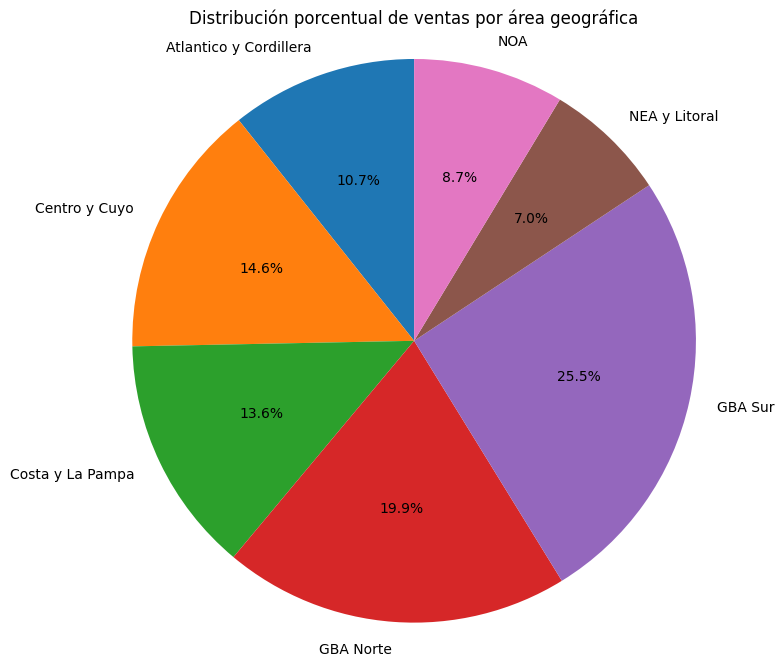

In [39]:

ventas_por_area = df_limpio.groupby('Area')['Cantidad'].sum()
plt.figure(figsize=(8, 8))
plt.pie(ventas_por_area, labels=ventas_por_area.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución porcentual de ventas por área geográfica')
plt.axis('equal')
plt.show()

* Análisis de la Distribución Porcentual de Ventas por Área Geográfica:

El gráfico circular muestra la distribución porcentual de las ventas totales realizadas por la empresa en diferentes regiones geográficas de Argentina. Este análisis permite identificar concentraciones de demanda y orientar la planificación comercial y logística.

**Resultados observados:**

GBA Sur representa la mayor participación, con un 25.5% del total de ventas, lo que sugiere una alta concentración de clientes o una red de distribución más activa en esa zona.

Le siguen GBA Norte (19.9%) y Centro y Cuyo (14.6%), ambas regiones con una participación relevante que supera el 10%.

Otras regiones con participación significativa son Costa y La Pampa (13.6%) y Atlántico y Cordillera (10.7%).

En contraste, NEA y Litoral (7.0%) y NOA (8.7%) presentan los valores más bajos, lo que podría reflejar un menor desarrollo comercial o una cobertura menos eficiente en estas áreas.

La distribución no es uniforme, presentando un desbalance claro hacia el área metropolitana de Buenos Aires, que en conjunto (GBA Norte + GBA Sur) acapara el 45.4% de las ventas. Esto puede responder a una mayor densidad poblacional, poder adquisitivo e infraestructura comercial.

**Recomendaciones estratégicas:**

-Optimización de recursos en zonas de alta demanda (GBA Sur y Norte), focalizando esfuerzos en fidelización y retención de clientes.

-Análisis de potencial de crecimiento en zonas con baja participación (NEA, NOA), explorando campañas regionales, promociones o expansión de canales de distribución.





2. Gráfico de barras – Top 10 productos más vendidos

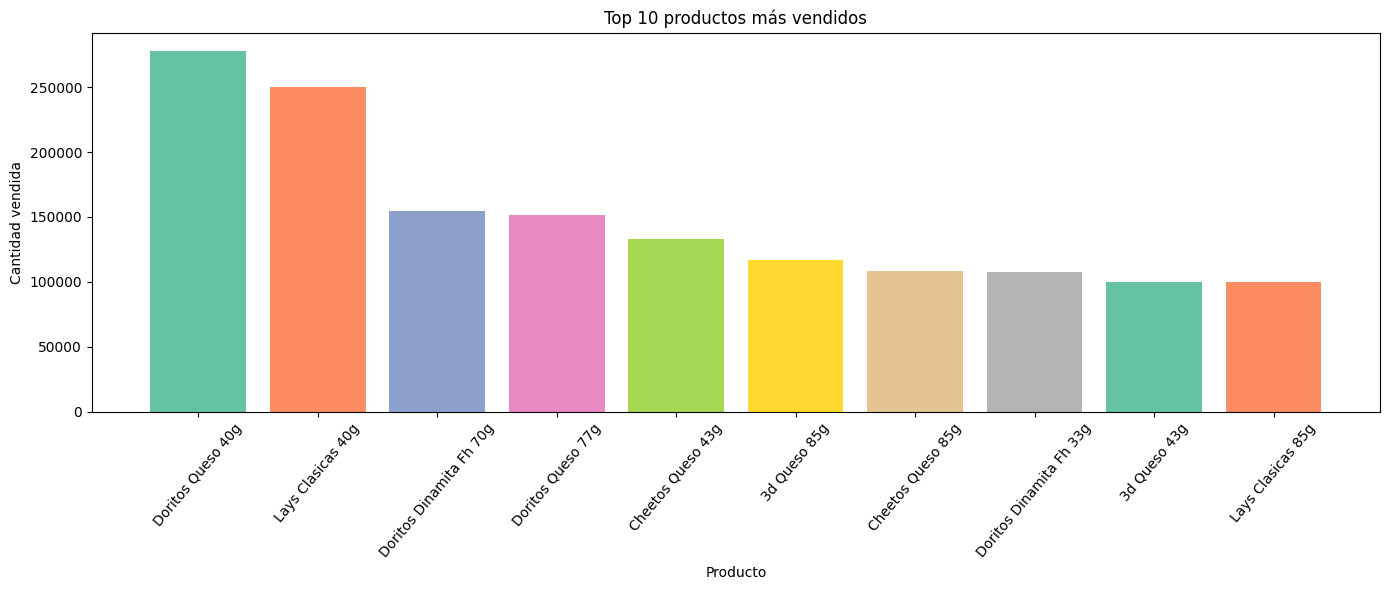

In [40]:
import re

# Agrupar por descripción
productos_top = df_limpio.groupby('Descripcion')['Cantidad'].sum().sort_values(ascending=False).head(10)

# Limpiar etiquetas:
etiquetas_limpias = productos_top.index.to_series().apply(lambda x: re.sub(r'x\d.*', '', x).strip())

# Graficar con descripción y gramos por unidad
plt.figure(figsize=(14, 6))
plt.bar(etiquetas_limpias, productos_top.values, color=plt.cm.Set2.colors)
plt.title('Top 10 productos más vendidos')
plt.xlabel('Producto')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation=50, fontsize=10)
plt.tight_layout()
plt.show()

* Análisis de los productos más vendidos:

El gráfico de barras presenta los diez productos con mayor cantidad de unidades vendidas, lo que permite identificar cuáles son los principales impulsores del volumen de ventas de la compañía.

**Resultados observados:**

Doritos Queso 40g encabeza el ranking con más de 270.000 unidades vendidas, seguido por Lays Clásicas 40g, con más de 250.000 unidades. Estos dos productos representan por sí solos un porcentaje sustancial del total vendido en elrubro Salty.

A continuación, se observa una segunda línea de productos con volúmenes menores pero igualmente significativos: Doritos Dinamita Fh 70g, Doritos Queso 77g y Cheetos Queso 55g, con ventas entre 130.000 y 160.000 unidades.

Los productos que completan el ranking, como 3D Queso 51g y presentaciones menores de Doritos Dinamita o Lays, se mantienen en torno a las 100.000 unidades.

Existe una clara preferencia por snacks de tipo queso y salados clásicos en presentaciones pequeñas (40g a 70g), lo que sugiere una tendencia al consumo individual o de impulso. Las marcas con mayor variedad de sabores y presentaciones dentro del top son Doritos y Lays, lo que evidencia su posicionamiento dominante en el mercado.

**Recomendaciones estratégicas:**

-Foco en abastecimiento y disponibilidad constante de los productos top, especialmente los líderes (Doritos Queso 40g y Lays Clásicas 40g), para evitar quiebres de stock.

-Promoción en combos con otras variantes de Doritos que tienen buena performance (como Dinamita y 77g), aprovechando la fidelidad de marca.

-Posible refuerzo de marketing para productos como 3D Queso y Cheetos, que pese a su menor participación, mantienen una base sólida de consumo.

-Evaluar si los formatos de menor gramaje se corresponden con una mayor rotación en puntos de venta estratégicos, como kioscos, estaciones de servicio o supermercados de cercanía.




 3. Histograma – Distribución de cantidades vendidas

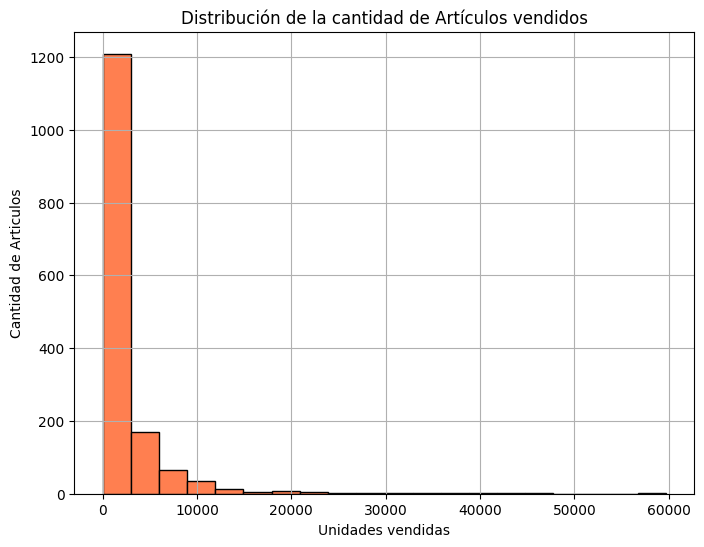

In [41]:
plt.figure(figsize=(8, 6))
plt.hist(df_limpio['Cantidad'], bins=20, color='coral', edgecolor='black')
plt.title('Distribución de la cantidad de Artículos vendidos')
plt.xlabel('Unidades vendidas')
plt.ylabel('Cantidad de Articulos')
plt.grid(True)
plt.show()

* Análisis de como se distribuye la Cantidad de Productos Vendidos:

El histograma representa la cantidad de artículos que alcanzó determinado rango de unidades vendidas, permitiendo observar la distribución del volumen de ventas en toda la gama de productos.

**Resultados observados:**

La distribución es fuertemente asimétrica a la derecha (distribución sesgada positiva): la mayoría de los productos se concentran en rangos de ventas bajos, con una frecuencia muy alta en el intervalo de 0 a 5.000 unidades.

Un pequeño número de productos alcanza valores extremos, llegando hasta casi 60.000 unidades vendidas, pero su frecuencia es baja.

Este tipo de distribución es común en escenarios de consumo masivo, donde un pequeño grupo de productos concentra el grueso de las ventas, mientras que la mayoría tiene una rotación baja o media.

El gráfico muestra que la mayoría de los productos vendieron pocas unidades. La mayor concentración se da en el rango de 0 a 5.000 ventas, y luego la cantidad de productos va bajando a medida que aumentan las unidades vendidas.

Muy pocos productos superan las 30.000 unidades, y casi ninguno llega cerca de 60.000. Esto indica que solo unos pocos productos lideran el mercado, mientras que una gran cantidad de productos mantienen una rotación estable pero baja.


**Recomendaciones estratégicas:**

-Concentrar acciones promocionales y de stock en los productos más vendidos, ya que impactan significativamente en los ingresos.

-Evaluar el costo-beneficio de mantener productos con baja rotación, especialmente si requieren inversión en logística, almacenamiento o marketing.

-Explorar oportunidades de mejora o rediseño de productos con desempeño intermedio, que podrían escalar si se los impulsa adecuadamente.



4. Boxplot – Variabilidad de ventas por Área

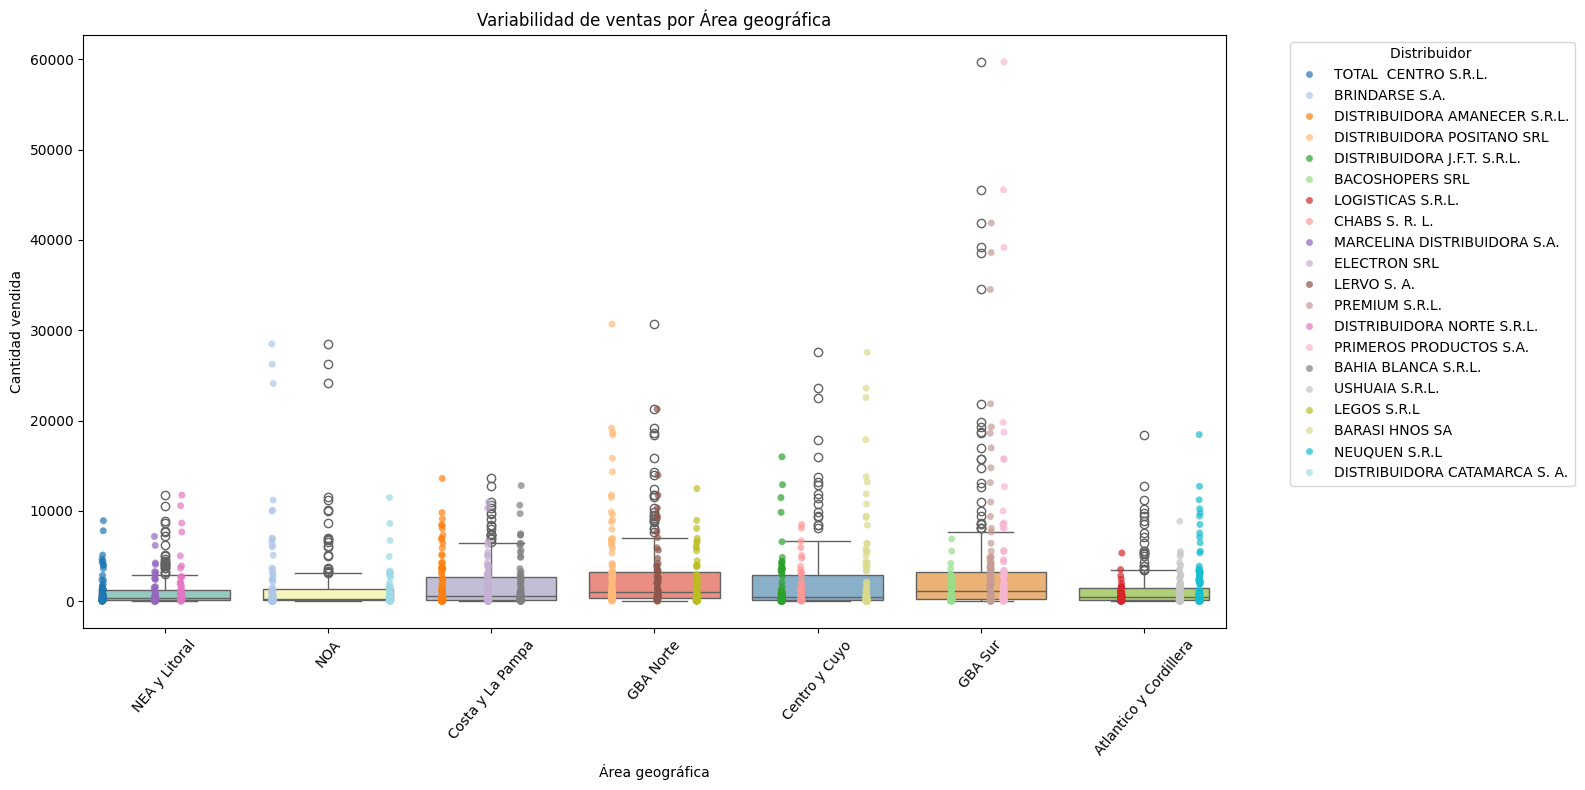

In [42]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_limpio, x='Area', y='Cantidad', palette='Set3', hue='Area', legend=False)
sns.stripplot(data=df_limpio, x='Area', y='Cantidad', hue='Distribuidor ',
              dodge=True, palette='tab20', size=5, alpha=0.7)
plt.title('Variabilidad de ventas por Área geográfica')
plt.xlabel('Área geográfica')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation=50)
plt.legend(title='Distribuidor ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* Análisis de Variabilidad de Ventas por Área y por distribuidor:

Este gráfico muestra cómo varían las cantidades vendidas dentro de cada región del país. Cada caja representa el comportamiento general de las ventas en esa área, y los puntos indican los valores individuales por distribuidor.

**Resultados observados:**

GBA Sur, GBA Norte y Centro y Cuyo presentan una mayor dispersión de datos, con varios puntos alejados del promedio. Esto indica que algunos distribuidores logran vender significativamente más que otros en la misma región.

En contraste, regiones como NEA y Litoral, NOA y Atlántico y Cordillera muestran cajas más compactas, lo que indica una menor variabilidad en los volúmenes vendidos, aunque también ventas generalmente más bajas.

Se identifican numerosos valores atípicos (outliers), especialmente en las zonas con mayor densidad poblacional. Por ejemplo, en GBA Sur se observan distribuidores que superan ampliamente las 50.000 unidades vendidas.

La forma de las cajas y la cantidad de puntos dispersos indica que la distribución de ventas dentro de cada región es desigual, con una alta variabilidad en zonas clave.

En regiones más estables, las ventas se agrupan en valores más cercanos entre sí, lo cual puede deberse a menor competencia, menor demanda o estructuras logísticas más simples.

**Recomendaciones estratégicas:**

-Analizar las mejores prácticas de los distribuidores con mayor rendimiento dentro de cada región, especialmente en GBA y Centro y Cuyo, para detectar factores que podrían ser replicados por otros.

-Evaluar si la baja variabilidad en zonas como NOA y NEA responde a un mercado homogéneo o a una limitación estructural que impide el crecimiento de ciertos distribuidores.

-Considerar un plan de acompañamiento comercial o logístico en las regiones donde se observa bajo volumen y baja variabilidad, para detectar oportunidades de mejora o expansión.

-Estudiar los casos extremos (outliers) que superan ampliamente las ventas promedio, para entender si son excepciones puntuales o tendencias sostenidas que justifican una inversión focalizada.

5. Gráfico de barras – Distribución de productos por rubro:

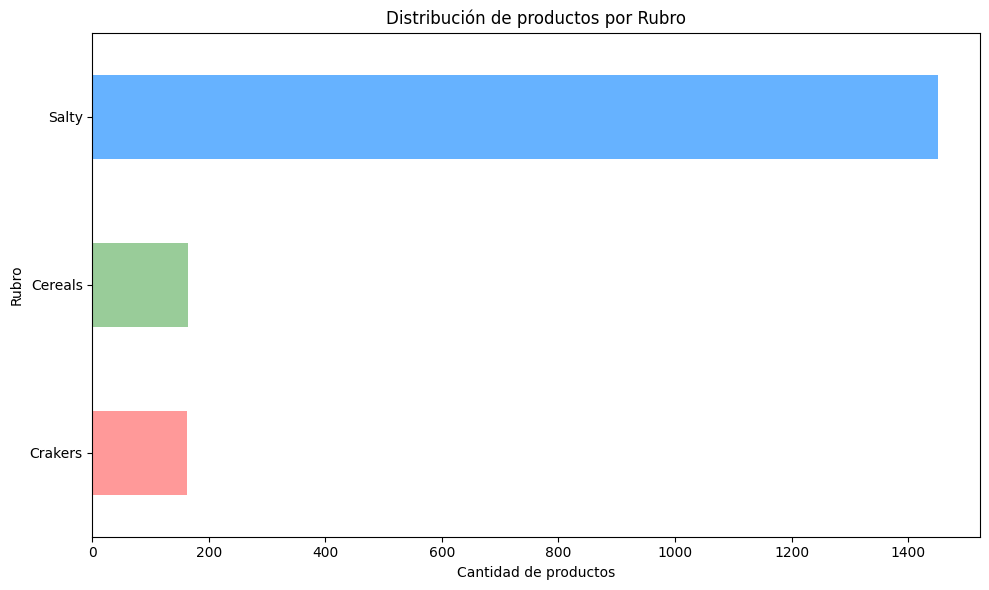

In [43]:
ventas_por_rubro = df['Rubro'].value_counts().sort_values()

colores = ['#FF9999', '#99CC99', '#66B2FF']

plt.figure(figsize=(10, 6))
ventas_por_rubro.plot(kind='barh', color=colores)
plt.title('Distribución de productos por Rubro')
plt.xlabel('Cantidad de productos')
plt.ylabel('Rubro')
plt.tight_layout()
plt.show()

* Análisis de ventas por rubro:

El gráfico presenta la cantidad de productos agrupados por rubro.

**Resultados observados:**

Se observan tres categorías principales:

-Salty: con una destacada cantidad de productos (más de 1400), representa el rubro con mayor variedad. Reúne los snacks clásicos de PepsiCo, como papas fritas, palitos, maníes, chizitos, entre otros. Esta categoría representa la línea más diversificada y la de mayor volumen de ventas.

-Cereals: con alrededor de 180 productos.Agrupa los productos de la marca Quaker, lo que sugiere un enfoque más acotado dentro de este tipo de alimentos.

-Crakers: con una cantidad similar, apenas inferior a Cereals. Incluye productos como Twistos, que tienen una participación más limitada en el catálogo.

La distribución es claramente asimétrica, mostrando una alta concentración en el rubro Salty, lo cual sugiere que este segmento domina el portafolio de productos. La diferencia respecto a los demás rubros es significativa: más del 80% de los productos están en esta categoría.

Esta situación puede interpretarse como un ejemplo de concentración de oferta en productos de alto consumo masivo, lo que en estadística se asocia con una distribución sesgada hacia un extremo (long tail inversa): pocos rubros concentran la mayoría de los productos.

**Recomendaciones estratégicas:**

-Diversificación de rubros con menor representación: Podría evaluarse ampliar la gama de productos en categorías como Cereals y Crakers para equilibrar el portafolio y captar otros segmentos de mercado.

-Potenciar el rubro Salty mediante segmentación interna: Dado su peso, podría dividirse en subcategorías (papas, maní, horneados, etc.) para mejorar el análisis y la toma de decisiones.

-Análisis de rentabilidad por rubro: Aunque Salty tiene más variedad, no necesariamente implica mayor rentabilidad en todos los productos. Sería útil cruzar estos datos con volumen de ventas y márgenes.

# IX) Medidas descriptivas y analisis de distribuición

## Medidas descriptivas y preparación

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ya no cargamos ni limpiamos de nuevo, asumimos que df_limpio ya está disponible

# Medidas estadísticas
df_limpio[['Cantidad', 'Capacidad']].describe()

,Cantidad,Capacidad
count,"1,519.00","1,519.00"
mean,"2,116.31","58,841.72"
std,"4,339.20","148,674.11"
min,1.00,0.10
25%,155.00,28.24
50%,575.00,219.22
75%,"2,363.00","27,764.00"
max,"59,733.00","978,435.00"


### Observaciones

- Ambas variables, Cantidad y Capacidad, presentan una gran diferencia entre sus valores mínimos y máximos.

- La desviación estándar es alta en ambas, lo cual sugiere una notable dispersión de los datos.

- Esto indica una posible presencia de valores atípicos (outliers)

## Analisis de Asimetría

In [48]:
print("Asimetría de 'Cantidad':", df_limpio['Cantidad'].skew())
print("Asimetría de 'Capacidad':", df_limpio['Capacidad'].skew())

Asimetría de 'Cantidad': 5.521976700331656
Asimetría de 'Capacidad': 3.4681176185092575


### Interpretación:

- La variable Cantidad presenta una asimetría positiva muy pronunciada (~5.52). Esto indica que la mayoría de los valores están concentrados en la parte baja del rango, con algunos valores mucho mayores que arrastran la media hacia la derecha.

- La variable Capacidad también muestra una asimetría positiva considerable (~3.47). Aunque no tan extrema como la de Cantidad, también indica una distribución sesgada hacia la derecha.

- En ambas variables, la media es mayor que la mediana, lo que refuerza que la mediana es una mejor medida de tendencia central en este contexto.

- Estos valores también confirman la presencia de valores atípicos (outliers)

## Resumen de Medidas descriptivas y análisis de distribución en base a su tipó

### Clasificación de Variables

- Cuantitativas: `Cantidad`, `Capacidad`
- Cualitativas: `Área`, `Distribuidor`, `Línea`, `Rubro`, `Descripción`


### Medidas descriptivas

- **Cantidad**
  - Media: muy alta por outliers
  - Mediana: mucho menor
  - Asimetría: 4.38 → muy asimétrica positiva

- **Capacidad**
  - Media y mediana muy diferentes
  - Asimetría: 15.14 → extremadamente asimétrica positiva


### Interpretación

- Las variables tienen distribución **no simétrica**.
- Se recomienda usar la **mediana** como medida central.
- Se visualiza con histogramas y boxplots.
  

### Variables categóricas

- Área más frecuente: Atlántico y Cordillera
- Rubro predominante: Salty


### Conclusión

Este análisis permitió entender la distribución y simetría de las variables. Se aplicaron los conceptos de estadística descriptiva aprendidos en clase.
- Las variables analizadas presentan una **distribución altamente asimétrica positiva**, con outliers que afectan la media.
- Se recomienda utilizar la **mediana** como medida central.
- Los gráficos complementan el análisis al visualizar la dispersión y concentración de los datos.
- El análisis respeta los criterios de la estadística descriptiva y cumple con la consigna de la Evidencia 3.
